# 第二章 基础二维图
## 2.5 并列/层叠柱状图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt

## 并列

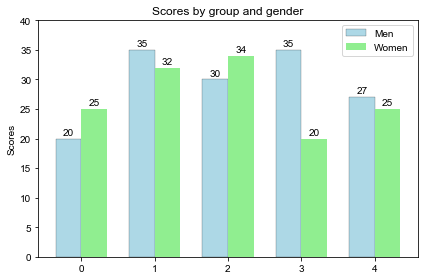

In [3]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35    

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        x=rect.get_x()+rect.get_width()/2
        ax.text(x, height*1.01,str(height),ha='center',va='bottom')

fig=plt.figure()
ax=plt.gca()
x=np.arange(len(labels))
bar_men=ax.bar(x-width/2, men_means, width, color='lightblue', label='Men',ec='k',lw=0.2)
bar_womman=ax.bar(x+width/2, women_means, width,color='lightgreen',label='Women')
autolabel(bar_men)
autolabel(bar_womman)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()
ax.set_ylim(0,40)

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_basic_1.pdf')
plt.show()

## 层叠

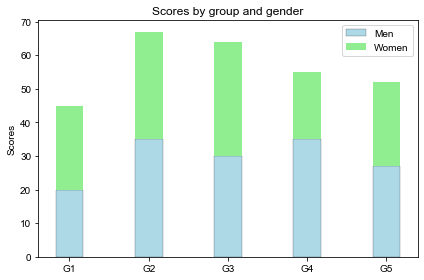

In [6]:
fig=plt.figure()
ax=plt.gca()
ax.bar(labels, men_means, width, color='lightblue', label='Men',ec='k',lw=0.2)
ax.bar(labels, women_means, width,color='lightgreen',bottom=men_means,label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_basic_2.pdf')
plt.show()

## Error bar

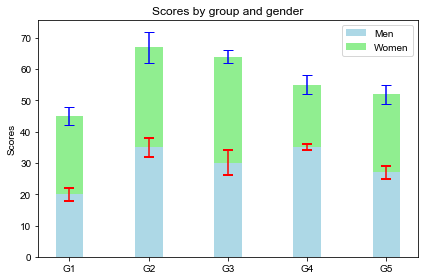

In [7]:
fig=plt.figure()
ax=plt.gca()
err_kw={'capsize':5, 'capthick':2,'ecolor':'r'}
ax.bar(labels, men_means, width, yerr=men_std,color='lightblue', label='Men',error_kw=err_kw)
ax.bar(labels, women_means, width,color='lightgreen', yerr=women_std, bottom=men_means,
       label='Women',ecolor='b',capsize=5)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_basic_3.pdf')
plt.show()

## 水平层叠

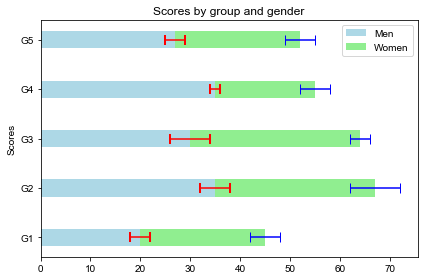

In [14]:
fig=plt.figure()
ax=plt.gca()
err_kw={'capsize':5, 'capthick':2,'ecolor':'r'}
ax.barh(labels, men_means, width, xerr=men_std,color='lightblue', label='Men',error_kw=err_kw)
ax.barh(labels, women_means, width,color='lightgreen', xerr=women_std, left=men_means,
       label='Women',ecolor='b',capsize=5)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_basic_4.pdf')
plt.show()

## 离散分布图

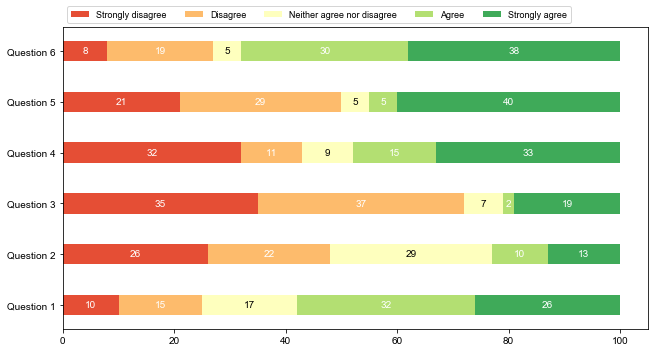

In [135]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

# survey(results, category_names)
fig=plt.figure(figsize=(9.2,5))
ax=plt.gca()
labels=list(results.keys())
data=np.array(list(results.values()))
data_cum=data.cumsum(axis=1)
height=0.4
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))
for i in range(0,data.shape[1]):
    starts=data_cum[:,i]-data[:,i]
    widths=data[:,i]
    xcenters = starts + widths / 2
    ax.barh(labels,widths,left=starts,height=height,label=category_names[i],color=category_colors[i])
    r, g, b, _ = category_colors[i]
    text_color = 'white' if r * g * b < 0.5 else 'k'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',color=text_color)
ax.legend(ncol=len(category_names),loc='lower left',bbox_to_anchor=(0,1),fontsize=9)

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_basic_5.pdf')
plt.show()

# 案例精讲
[Susanne et al., 2020, Figure 3b](https://www.nature.com/articles/s41586-020-2187-y)

In [70]:
# data=pd.read_excel('data/Susanne_Nature_2020/Figure3b.xlsx',sheet_name='Sheet3')
datafile='data/Susanne_Nature_2020/Figure3b.xlsx'
labels=['NEBD to metaphase',
        'Metaphase',
        'Anaphase to cytokinesis',
        'Mitotic arrest',
        'Death in mitosis',
        'Mitotic slippage']
colors=[(88/255, 129/255, 184/255),
        (247/255, 193/255, 67/255),
        (159/255, 205/255, 99/255),
        (236/255, 51/255, 35/255),
        'k',
        (11/255, 251/255, 253/255)]
titles=['siPTTG1', 'siSGO2', 'siSGO2/PTTG1', 
        'siSGO2/PTTG1/MCL1', 'siSGO2/PTTG1/MCL1\n+ transgen. His6-MCL1-WT',
        'siSGO2/PTTG1/MCL1\n+ transgen. His6-MCL1-TEV']
keys=['A','B','C','D','E','F']

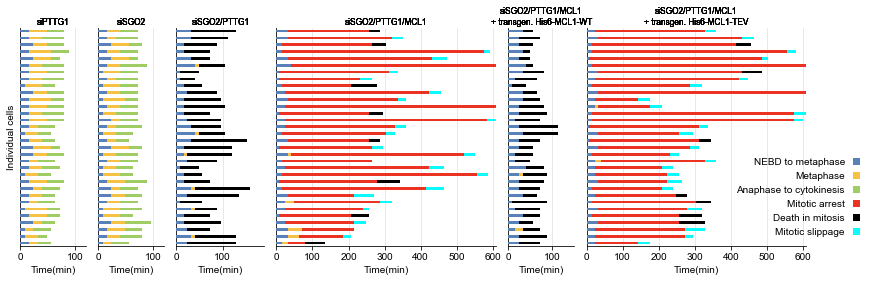

In [134]:
fig,axs=plt.subplots(1,6,sharex=False,sharey=True,gridspec_kw={"width_ratios":[0.3,0.3,0.4,1,0.3,1],
                                                               "height_ratios":[1]},figsize=(12,4))
barwidth=0.4
for i in range(0,6):
    data=pd.read_excel(datafile,sheet_name='Sheet'+str('%.0f'% (i+1)))
    data=data.fillna(0)
    data_values=data.values
    data_cum=data_values.cumsum(axis=1)
    ax=axs[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_ticks([])
    ax.grid(axis='x',which='major',color='lightgray',linewidth=0.5,zorder=1)
    for j in range(0,len(keys)):
        starts=data_cum[:,j]-data_values[:,j]
        values=data[keys[j]].values
        label=None
        if(i==5):
            label=labels[j]
        ax.barh(np.arange(0,len(values)),data_values[:,j],height=barwidth,left=starts,color=colors[j],label=label,zorder=5)
        ax.text(0.5,1.01,titles[i],transform=ax.transAxes,ha='center',va='bottom',fontsize='small')
        ax.set_xlabel('Time(min)')
legend=ax.legend(loc='lower left',bbox_to_anchor=(0.64,0),markerfirst=False,frameon=False)
for legend_handle in legend.legendHandles:
    legend_handle.set_width(legend_handle.get_height())
ax.set_ylim(0-barwidth,len(values)-1+barwidth)
axs[0].set_xlim(0,120)
axs[1].set_xlim(0,120)
axs[2].set_xlim(0,190)
axs[3].set_xlim(0,610)
axs[4].set_xlim(0,150)
axs[5].set_xlim(0,610)
axs[0].set_ylabel('Individual cells')
# savefig
plt.subplots_adjust(wspace=0.1,left=0.02,right=0.93)
# plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_5_case1.pdf')
plt.show()